# KNN Theory and Code

The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful, supervised machine learning algorithm used for both classification and regression tasks.

### How it Works:
1. **Training Phase**: KNN doesn't have an explicit training phase. Instead, it stores the entire training dataset.
2. **Prediction Phase**:
   - For a given new data point, KNN identifies the 'K' closest data points from the training set. The closeness is typically measured using distance metrics like Euclidean distance. 
   $$ \text{Euclidean distance} = \sqrt{\sum{(x1 - x2)^2}} $$
   - **Classification**: The new data point is assigned the class that is most common among its K nearest neighbors (majority vote).
   - **Regression**: The value of the new data point is predicted by averaging the values of its K nearest neighbors.

### Key Characteristics:
- **Non-parametric**: KNN makes no assumptions about the underlying data distribution.
- **Lazy Learning**: It doesn't learn a model but makes decisions based on the entire dataset at prediction time.

### Example:
Imagine you have a dataset of fruits with features like weight and color. If you want to classify a new fruit, KNN will look at the K nearest fruits in the dataset and assign the new fruit to the most common category among those neighbors.

KNN is appreciated for its simplicity and effectiveness, especially in scenarios where the decision boundary is irregular.

<img src='./files/knn.png' style='background-color:white'/>

In [49]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [50]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])


## Dataset

The Iris dataset is a classic and widely used dataset in the field of machine learning and statistics. Here are some key points about it:

- **Origin**: Introduced by the British statistician and biologist Ronald Fisher in 1936³.
- **Composition**: It consists of 150 samples of iris flowers from three different species: Setosa, Versicolor, and Virginica⁵.
- **Features**: Each sample includes four features:
  - Sepal length (in cm)
  - Sepal width (in cm)
  - Petal length (in cm)
  - Petal width (in cm)⁵
- **Purpose**: Originally used to demonstrate linear discriminant analysis, it is now commonly used for testing various machine learning algorithms and visualizations³.

The dataset is particularly valued for its simplicity and the clear distinction between the species, making it an excellent starting point for beginners in machine learning.

In [51]:

iris = datasets.load_iris()
X, y = iris.data, iris.target


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

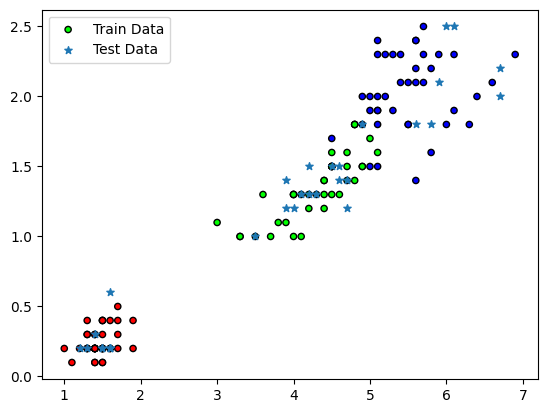

In [55]:
# Plot Train and Test data together
plt.figure()
plt.scatter(X_train[:,2],X_train[:,3], c=y_train, cmap=cmap, edgecolor='k', s=20, label='Train Data')
plt.scatter(X_test[:,2],X_test[:,3], s=30, marker='*', label='Test Data')
plt.legend()
plt.show()


In [56]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [57]:
predictions = np.array([int(x) for x in predictions])
predictions

array([1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [58]:
y_test

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

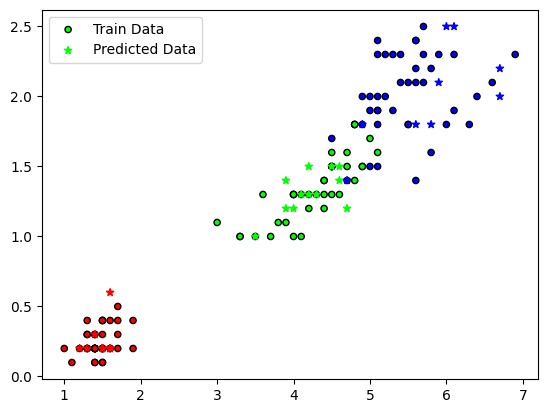

In [74]:
# Plot Train and Test data together
plt.figure()
plt.scatter(X_train[:,2],X_train[:,3], c=y_train, cmap=cmap, edgecolor='k', s=20, label='Train Data')
plt.scatter(X_test[:,2],X_test[:,3], c=predictions, cmap=cmap,  s=30, label='Predicted Data',marker='*')
plt.legend()
plt.show()


In [65]:
# number of test data:
print(f"Number of Test Data: {len(y_test)}")
number_of_false_predicted = np.sum(y_test!=predictions)
print(f"Number of False Predicted by KNN: {int(number_of_false_predicted)}")
number_of_true_predicted = np.sum(y_test==predictions)
print(f"Number of True Predicted by KNN: {int(number_of_true_predicted)}")
# print(predictions)
acc = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {acc}")

Number of Test Data: 30
Number of False Predicted by KNN: 1
Number of True Predicted by KNN: 29
Accuracy: 0.9666666666666667


Resources:

- https://www.youtube.com/watch?v=zeFt_JCA3b4
- https://www.youtube.com/watch?v=ngLyX54e1LU